In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import os
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from FACS_Sampling.utils import create_adata

sc.set_figure_params(figsize=(8,8), fontsize=15, )

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
import warnings
warnings.filterwarnings("ignore")

/home/ekarimi/miniconda3/envs/facs_sampling/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.0 scipy==1.11.4 pandas==2.1.1 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.3 pynndescent==0.5.11


In [3]:

# Get the file path from the environment variable
file_path_env = os.getenv('MY_FACS_DATA_PATH')
input_file1 = os.path.join(file_path_env,'sara_data',"adata_ref_sara_10M.h5ad")
adata_ref = sc.read_h5ad(input_file1)

In [4]:
adata = adata_ref.copy()

In [5]:
adata.obs['subtype'].value_counts()

subtype
nk,_npm1+_flt3_itd_(>0,5)       1252975
nk,_npm1+                       1092905
nk,_npm1_wt;_flt3_itd_(<0,5)     936961
nk,_npm1+_flt3_itd_(<0,5)        888854
inv(16)                          876843
trisomy_8                        751315
nk,_npm1_wt,_flt3_wt             709555
apl                              588059
complex,_tp53                    544301
idh2                             433257
nk,_npm1_wt;_flt3_itd_(>0,5)     351251
t(8;21),_c_kit                   333315
nk,_cebpa                        274362
healthy                          253008
evi1                             217331
del5                             210997
complex,_del5                    136657
t(8;21)                          135063
idh1                              12991
Name: count, dtype: int64

In [6]:
adata_ref = adata[adata.obs['subtype'] == 'nk,_npm1+_flt3_itd_(>0,5)'].copy()

In [7]:
adata_ref.obs['population'].value_counts()

population
(progenitor)_erythroid_like          463954
classical_monocytes                  251204
late_promyelocyte_like               242982
hspc_like                             95113
myelocytes                            81003
intermediate_monocyte_like            42354
non_classical_monocyte_like           22114
granulocyte_progenitor_like           20184
early_promyelocyte_like               15937
neutrophil_like                        4715
activated_classical_monocyte_like      4010
conventional_dendritic_like            2545
eosinophil_like                        2283
cd117+_hscp_like                       2185
pdc_progenitor_like                    1450
pdc_like                                942
Name: count, dtype: int64

## balanced adata for an overview on the manifold of the data over the populataions 

In [8]:
# Assuming 'adata' is your original AnnData object
# and 'population' is your categorical variable of interest

# Get the counts of each category in 'population'
population_counts = adata_ref.obs['population'].value_counts()

# Find the minimum count to balance the dataset
min_count = population_counts.min()

# Create a list to store balanced data
balanced_data = []

# Iterate over each category and randomly sample
for population in population_counts.index:
    subset = adata_ref[adata_ref.obs['population'] == population]
    balanced_subset = subset[:min_count, :] if subset.n_obs > min_count else subset
    balanced_data.append(balanced_subset)

# Concatenate all balanced subsets
balanced_adata = balanced_data[0].concatenate(balanced_data[1:])

# Proceed with analysis on balanced_adata


computing PCA
    with n_comps=21
    finished (0:00:00)
computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:13)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


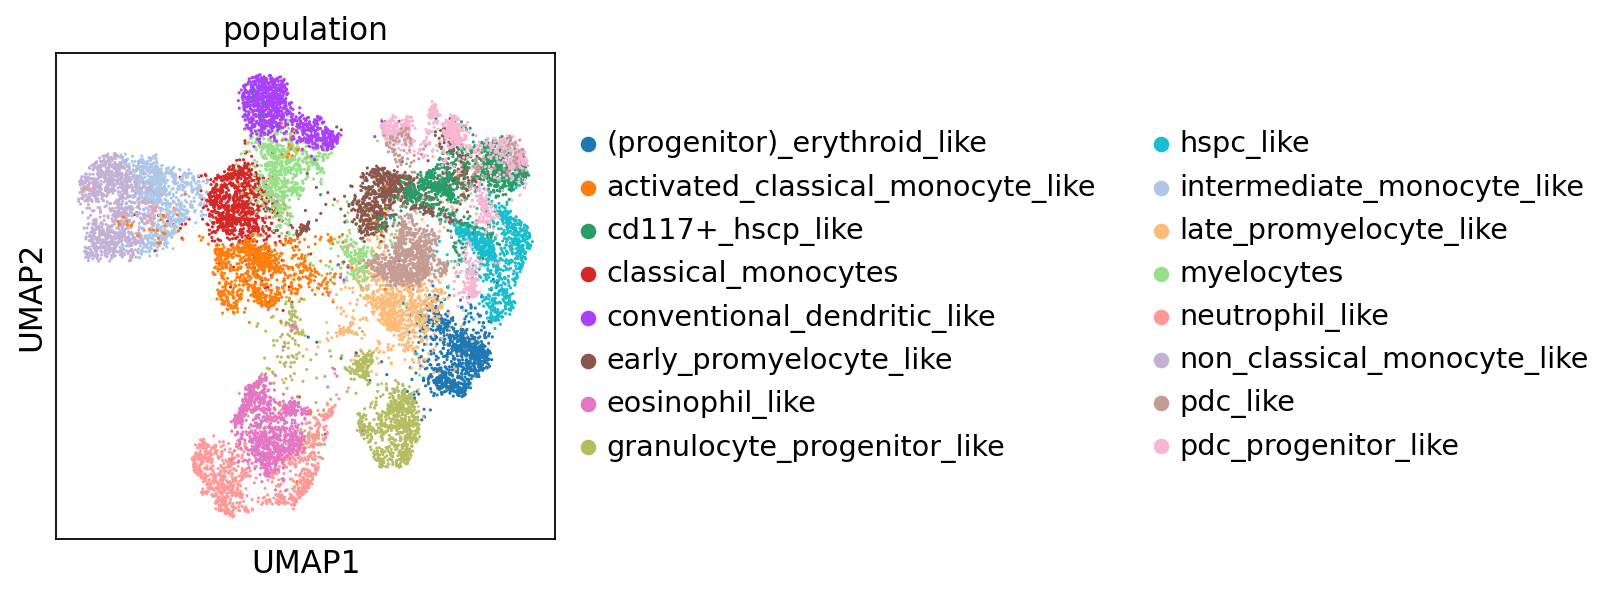

In [9]:
# Proceed with your analysis on filtered_adata
# For example, running PCA and UMAP for visualization
sc.tl.pca(balanced_adata)
sc.pp.neighbors(balanced_adata)
sc.tl.umap(balanced_adata)

# Plotting the UMAP
sc.pl.umap(balanced_adata, color='population')

In [10]:
balanced_adata

AnnData object with n_obs × n_vars = 15072 × 22
    obs: 'old_index', 'unique_id', 'sex', 'age', 'subtype', 'type', 'blastcount', 'survival_sorter', 'run', 'sample_id', 'alignment_mc_aligned', 'flowsom_cluster', 'flowsom_metacluster', 'population', 'batch'
    uns: 'pca', 'neighbors', 'umap', 'population_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [11]:
random_indices = np.random.choice(adata_ref.obs.index, size=15072, replace=False)

# Create new AnnData object with randomly selected samples
random_adata = adata_ref[random_indices, :]

computing PCA
    with n_comps=21
    finished (0:00:00)
computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


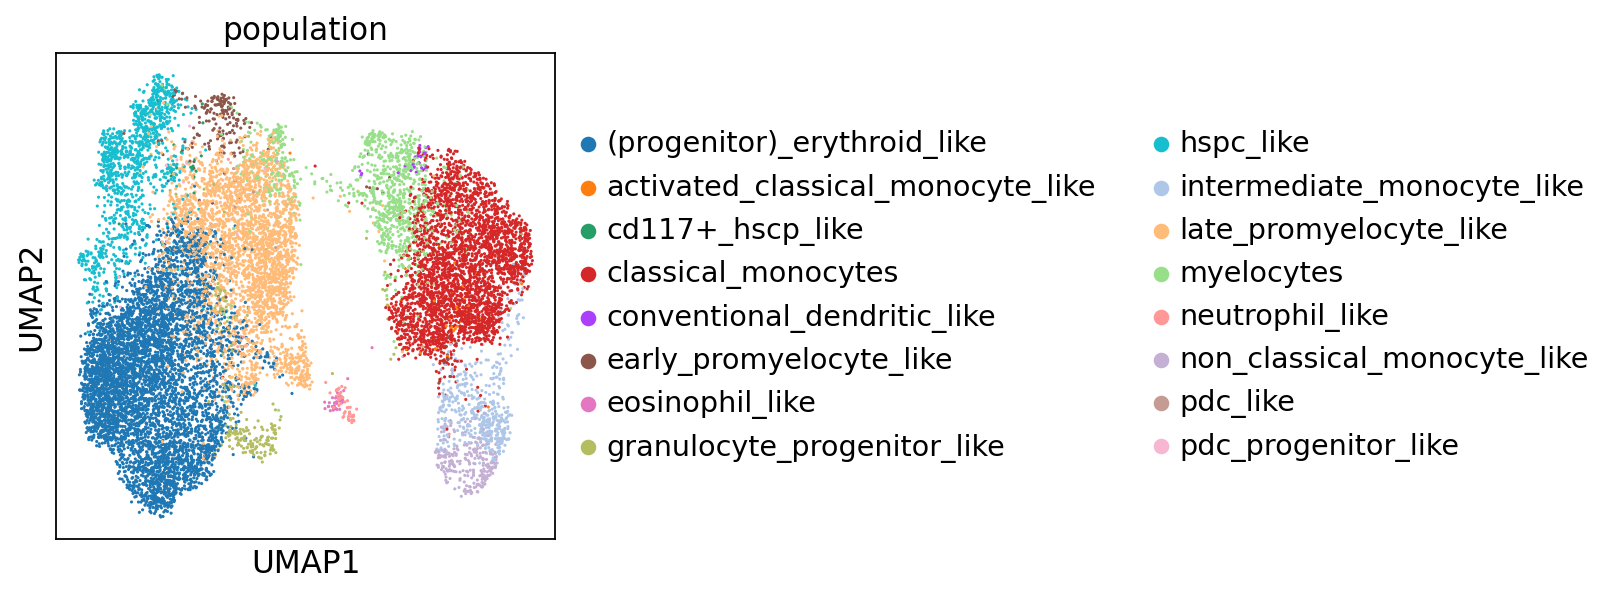

In [12]:
# Proceed with your analysis on filtered_adata
# For example, running PCA and UMAP for visualization
sc.tl.pca(random_adata)
sc.pp.neighbors(random_adata)
sc.tl.umap(random_adata)

# Plotting the UMAP
sc.pl.umap(random_adata, color='population')

In [13]:
balanced_adata.obs['population'].value_counts()

population
(progenitor)_erythroid_like          942
activated_classical_monocyte_like    942
cd117+_hscp_like                     942
classical_monocytes                  942
conventional_dendritic_like          942
early_promyelocyte_like              942
eosinophil_like                      942
granulocyte_progenitor_like          942
hspc_like                            942
intermediate_monocyte_like           942
late_promyelocyte_like               942
myelocytes                           942
neutrophil_like                      942
non_classical_monocyte_like          942
pdc_like                             942
pdc_progenitor_like                  942
Name: count, dtype: int64

In [14]:
random_adata.obs['population'].value_counts()/15072

population
(progenitor)_erythroid_like          0.368498
classical_monocytes                  0.201433
late_promyelocyte_like               0.197253
hspc_like                            0.076765
myelocytes                           0.066680
intermediate_monocyte_like           0.032312
non_classical_monocyte_like          0.016454
granulocyte_progenitor_like          0.014331
early_promyelocyte_like              0.012805
neutrophil_like                      0.003915
activated_classical_monocyte_like    0.002654
eosinophil_like                      0.001990
conventional_dendritic_like          0.001924
cd117+_hscp_like                     0.001393
pdc_progenitor_like                  0.000929
pdc_like                             0.000663
Name: count, dtype: float64

## data preparation

In [125]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(adata_ref.X)
X = data_standardized

In [126]:
start_time = time.time()
pca = PCA(n_components=22)
pca.fit(X)
X_pca = pca.transform(X)
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")
pca.explained_variance_ratio_

Elapsed time: 1.9828753471374512 seconds


array([0.37054079, 0.099742  , 0.06399754, 0.05763805, 0.04950916,
       0.04743741, 0.04388254, 0.03418533, 0.03005226, 0.02786005,
       0.02446273, 0.02386512, 0.02246468, 0.02098996, 0.01659071,
       0.01573509, 0.01420638, 0.01209402, 0.00977279, 0.00562053,
       0.00509799, 0.00425487])

In [129]:
df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'PC4': X_pca[:, 3],
    'PC5': X_pca[:, 4],
    'PC6': X_pca[:, 5],
    'PC7': X_pca[:, 6],
    'PC8': X_pca[:, 7],
    'PC9': X_pca[:, 8],
    'PC10': X_pca[:, 9],
    'PC11': X_pca[:, 10],
    'PC12': X_pca[:, 11],
    'PC13': X_pca[:, 12],
    'PC14': X_pca[:, 13],
    'PC15': X_pca[:, 14],
    'PC16': X_pca[:, 15],
    'PC17': X_pca[:, 16],
    'PC18': X_pca[:, 17],
    'PC19': X_pca[:, 18],
    'PC20': X_pca[:, 19],
    'PC21': X_pca[:, 20],
    'PC22': X_pca[:, 21],
    'Label': list(adata_ref.obs['population'].values) 
})


In [95]:
import numpy as np
import pandas as pd

def pca_bin_sample_(df, feature_importances, num_pcs=22, max_points=1, seed=12345, verbose=False):
    np.random.seed(seed)

    # Ensure num_pcs does not exceed the number of columns in df
    num_pcs = min(num_pcs, df.shape[1])

    # Function to create bins and digitize
    def create_bins_and_digitize(data, n_bins):
        edges = np.linspace(data.min(), data.max(), n_bins + 1)
        bins = np.digitize(data, edges)
        return bins

    # Function to compute single sample bins
    def compute_sample_bins(df, bin_sizes, num=1):
        bins = [create_bins_and_digitize(df.iloc[:, i], bin_sizes[i]) for i in range(num_pcs)]

        # Combine bins to form grid cells
        df['grid_cell'] = list(zip(*bins))

        # Group by grid cells and count samples in each
        grouped = df.groupby('grid_cell').size()

        # List of desired bin counts
        desired_counts = list(range(1,num+1))

        # Return bins that match the desired counts
        return grouped[grouped.isin(desired_counts)]

    single_sample_bins = compute_sample_bins(df, feature_importances, max_points)
    print(f'Number of samples with the initial bin sizes in each PC is {len(single_sample_bins)}')

    # Get indices from bins with exactly one sample
    single_sample_bins = compute_sample_bins(df, feature_importances, max_points).index
    sampled_indices = df[df['grid_cell'].isin(single_sample_bins)].index

    print(f'Number of PCs: {num_pcs}')
    print(f'Number of bins per feature: {feature_importances}')
    print(f'Number of samples: {len(single_sample_bins)}')

    return sampled_indices




In [65]:
import numpy as np
import pandas as pd

def pca_bin_sample_feature_importance(df, bin_sizes, max_points = 1, seed=12345, min_single_sample_bins=5000, verbose=False):
    np.random.seed(seed)

    # Ensure num_pcs does not exceed the number of columns in df
    # num_pcs = min(num_pcs, df.shape[1])

    # Function to create bins and digitize
    def create_bins_and_digitize(data, bin_size):
        mean = np.mean(data)
        max_bin_edge = max(data.max() - mean, mean - data.min())
        num_bins_each_side = int(np.ceil(max_bin_edge / bin_size))
        edges = np.arange(mean - num_bins_each_side * bin_size, mean + (num_bins_each_side + 1) * bin_size, bin_size)
        bins = np.digitize(data, edges)
        return bins

    # Function to compute single sample bins
    def compute_single_sample_bins(df, bin_sizes):
        bins = [create_bins_and_digitize(df.iloc[:, i], bin_sizes[i]) for i in range(df.shape[1]-2)]

        # Combine bins to form grid cells
        df['grid_cell'] = list(zip(*bins))

        # Group by grid cells and count samples in each
        grouped = df.groupby('grid_cell').size()

        # Return single sample bins
        return grouped[grouped == 1]
    
    
    def compute_sample_bins(df, bin_sizes, num=1):
        bins = [create_bins_and_digitize(df.iloc[:, i], bin_sizes[i]) for i in range(df.shape[1]-2)]

        # Combine bins to form grid cells
        df['grid_cell'] = list(zip(*bins))

        # Group by grid cells and count samples in each
        grouped = df.groupby('grid_cell').size()

        # List of desired bin counts
        desired_counts = list(range(1,num+1))

        # Return bins that match the desired counts
        return grouped[grouped.isin(desired_counts)]
    
    
        def assign_bin_counts(importance, min_bins, max_bins):
        # Normalize importance scores to sum to 1
        normalized_importance = importance / np.sum(importance)
        # Assign bin counts proportionally
        bin_counts = np.ceil(normalized_importance * (max_bins - min_bins) + min_bins).astype(int)
        return bin_counts

    # Get bin counts for each feature
    bin_counts = assign_bin_counts(feature_importance, min_bins, max_bins)




    single_sample_bins = compute_sample_bins(df, bin_sizes, max_points)
    print(f'Number of samples with the initial bin sizes in each PC is {len(single_sample_bins)}')

    # Get indices from bins with exactly one sample
    single_sample_bins = compute_sample_bins(df, bin_sizes).index
    sampled_indices = df[df['grid_cell'].isin(single_sample_bins)].index

    # print(f'Number of PCs: {num_pcs}')
    print(f'Number of bins: {len(bin_sizes)}')
    print(f'Number of samples: {len(single_sample_bins)}')

    return sampled_indices


# TEST

In [19]:
def pca_bin_sample(df, num_pcs=4, seed=12345, n_bins=50, min_single_sample_bins=5000, verbose= False):
    np.random.seed(seed)

    # Ensure num_pcs does not exceed the number of columns in df
    num_pcs = min(num_pcs, df.shape[1])

    # Function to create bins and digitize
    def create_bins_and_digitize(data, n_bins):
        # print(f"Data type: {data.dtype}, Min: {data.min()}, Max: {data.max()}")
        edges = np.linspace(data.min(), data.max(), n_bins + 1)
        bins = np.digitize(data, edges)
        return bins
    
    # Function to compute single sample bins
    def compute_single_sample_bins(df, n_bins):
        bins = [create_bins_and_digitize(df.iloc[:, i], n_bins) for i in range(num_pcs)]

        # Combine bins to form grid cells
        df['grid_cell'] = list(zip(*bins))

        # Group by grid cells and count samples in each
        grouped = df.groupby('grid_cell').size()

        # Return single sample bins
        return grouped[grouped == 1]


    
    
    # Check if number of single-sample bins is below threshold
    single_sample_bins = compute_single_sample_bins(df, n_bins)
    print(f'number of samples with the initial {n_bins} bins in each PC is {len(single_sample_bins)}' )
    while len(single_sample_bins) < min_single_sample_bins:
        # Increase bin size and re-bin if necessary
        n_bins = int(n_bins * 2)
        single_sample_bins = compute_single_sample_bins(df, n_bins)
        if verbose:
            print(len(single_sample_bins))

        
    initial_n_bins = n_bins
    

    # Binary search setup
    low = 1
    # high = initial_n_bins * 2
    high = initial_n_bins * 2
    n_bins = initial_n_bins
    while low < high:
        n_bins = (low + high) // 2
        single_sample_bins = compute_single_sample_bins(df, n_bins)
        if len(single_sample_bins) < min_single_sample_bins:
            low = n_bins + 1
            if verbose:
                print(f'range is  : {low} - {high}.')
        else: 
        # elif len(single_sample_bins) > min_single_sample_bins * 1.01:
            high = n_bins - 1
            if verbose:
                print(f'range is  : {low} - {high}.')
        # else:
        #     break

    # Get indices from bins with exactly one sample
    single_sample_bins = compute_single_sample_bins(df, n_bins).index
    sampled_indices = df[df['grid_cell'].isin(single_sample_bins)].index
    print(f'number of  PCs: {num_pcs}')
    print(f'number of bins: {n_bins}')
    print(f'number of samples: {len(single_sample_bins)}')
                                
    return sampled_indices, n_bins


## try on the full dataset.

In [20]:
real_df = pd.DataFrame(adata_ref.X, columns=adata_ref.var_names)
real_df['Label'] = list(adata_ref.obs['population'].values)

In [21]:
print(f'********* #full dataset *********')
start_time = time.time()

real_bin_out = pca_bin_sample(real_df, n_bins=5, num_pcs=22, min_single_sample_bins=10000, verbose=True)[0]

elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

********* #full dataset *********
number of samples with the initial 5 bins in each PC is 48234
range is  : 1 - 4.
range is  : 3 - 4.
range is  : 4 - 4.
number of  PCs: 22
number of bins: 3
number of samples: 6799
Elapsed time: 22.09891104698181 seconds


In [22]:
len(real_bin_out)

6799

# test the clustering on the cubes

In [61]:
df['grid_cell']

0          (6, 16, 60, 27)
1          (4, 15, 56, 28)
2          (6, 18, 59, 29)
3          (4, 14, 59, 28)
4          (6, 14, 58, 28)
                ...       
1252970    (6, 17, 59, 29)
1252971    (6, 17, 57, 30)
1252972    (5, 16, 58, 32)
1252973    (5, 14, 59, 26)
1252974    (4, 15, 57, 28)
Name: grid_cell, Length: 1252975, dtype: object

In [106]:
def set_min_to_two(pca):
    out = np.ceil(pca.explained_variance_ratio_*100).astype(int)
    for i in range(out.shape[0]):
        if out[i] <2:
            out[i] = 2
    return out

array([38, 10,  7,  6,  5,  5,  5,  4,  4,  3,  3,  3,  3,  3,  2,  2,  2,
        2,  2,  2,  2,  2])

In [140]:
print(f'********* #full dataset *********')
start_time = time.time()

# cube_out, _ = pca_bin_sample_connected_components(real_df, n_bins=4, num_pcs=22, min_single_sample_bins=10000, verbose=True)

# bin_sizes = X_pca.var(axis=0)*10000
# feature_importances = np.ceil(pca.explained_variance_ratio_*100).astype(int)
feature_importances = set_min_to_two(pca)

# pbsfi_indices = pca_bin_sample_feature_importance(df, bin_sizes, max_points=1)
sampled_indices = pca_bin_sample_(df, feature_importances, max_points=1)

elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

********* #full dataset *********
Number of samples with the initial bin sizes in each PC is 6989
Number of PCs: 22
Number of bins per feature: [38 10  7  6  5  5  5  4  4  3  3  3  3  3  2  2  2  2  2  2  2  2]
Number of samples: 6989
Elapsed time: 7.54680609703064 seconds


In [109]:
len(sampled_indices)

11275

In [193]:
def accumulate_indices_until_threshold(df, threshold):
    # Count the occurrences of each grid_cell
    grid_cell_counts = df['grid_cell'].value_counts()

    # Sort the grid_cells by count in ascending order
    sorted_grid_cells = grid_cell_counts.sort_values()

    # Group the DataFrame by 'grid_cell'
    grouped_df = df.groupby('grid_cell')

    accumulated_indices = []
    accumulated_count = 0

    # Iterate over sorted grid_cells and accumulate indices
    for grid_cell in sorted_grid_cells.index:
        if accumulated_count >= threshold:
            break
        group_indices = grouped_df.get_group(grid_cell).index
        accumulated_indices.extend(group_indices)
        accumulated_count += len(group_indices)

    return accumulated_indices

In [194]:
print(f'********* #full dataset *********')
start_time = time.time()


threshold = 10000  # Set your desired threshold
accumulated_indices = accumulate_indices_until_threshold(df, threshold)

elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")


********* #full dataset *********
Elapsed time: 3.2337751388549805 seconds


In [195]:
len(accumulated_indices)

10001

In [69]:
adata_ref

AnnData object with n_obs × n_vars = 1252975 × 22
    obs: 'old_index', 'unique_id', 'sex', 'age', 'subtype', 'type', 'blastcount', 'survival_sorter', 'run', 'sample_id', 'alignment_mc_aligned', 'flowsom_cluster', 'flowsom_metacluster', 'population'

In [196]:
adata_ref[accumulated_indices].obs['population'].value_counts()

population
classical_monocytes                  1770
myelocytes                           1505
(progenitor)_erythroid_like          1395
late_promyelocyte_like               1156
neutrophil_like                      1134
intermediate_monocyte_like            819
granulocyte_progenitor_like           692
non_classical_monocyte_like           323
hspc_like                             319
early_promyelocyte_like               293
eosinophil_like                       248
conventional_dendritic_like           136
activated_classical_monocyte_like      79
pdc_progenitor_like                    57
pdc_like                               48
cd117+_hscp_like                       27
Name: count, dtype: int64

In [197]:
start_time = time.time()

# Compute PCs.
from fbpca import pca
U, s, Vt = pca(X, k=4) # E.g., 4 PCs.
X_dimred = U[:, :4] * s[:4]
# Now, you are ready to sketch!

# Sketch.
from geosketch import gs
N = len(accumulated_indices) # Number of samples to obtain from the data set.
sketch_index = gs(X_dimred, N, replace=False)

# X_sketch = X_dimred[sketch_index]
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 38.7581992149353 seconds


In [192]:
adata_ref[accumulated_indices].obs['population'].value_counts()

population
classical_monocytes                  24951
myelocytes                           14929
(progenitor)_erythroid_like          11874
late_promyelocyte_like               11519
intermediate_monocyte_like           10809
granulocyte_progenitor_like           6191
non_classical_monocyte_like           5500
neutrophil_like                       4055
hspc_like                             3875
early_promyelocyte_like               2381
eosinophil_like                       1801
activated_classical_monocyte_like      786
conventional_dendritic_like            715
cd117+_hscp_like                       235
pdc_like                               191
pdc_progenitor_like                    188
Name: count, dtype: int64

In [191]:
adata_ref[sketch_index].obs['population'].value_counts()

population
myelocytes                           20632
classical_monocytes                  17773
late_promyelocyte_like               13350
(progenitor)_erythroid_like          11550
hspc_like                             7765
intermediate_monocyte_like            6452
granulocyte_progenitor_like           6357
early_promyelocyte_like               4561
neutrophil_like                       3860
non_classical_monocyte_like           3632
eosinophil_like                       1735
conventional_dendritic_like            878
activated_classical_monocyte_like      537
pdc_progenitor_like                    435
cd117+_hscp_like                       364
pdc_like                               119
Name: count, dtype: int64

In [199]:
rs = np.random.randint(0, adata_ref.shape[0], size=len(accumulated_indices))

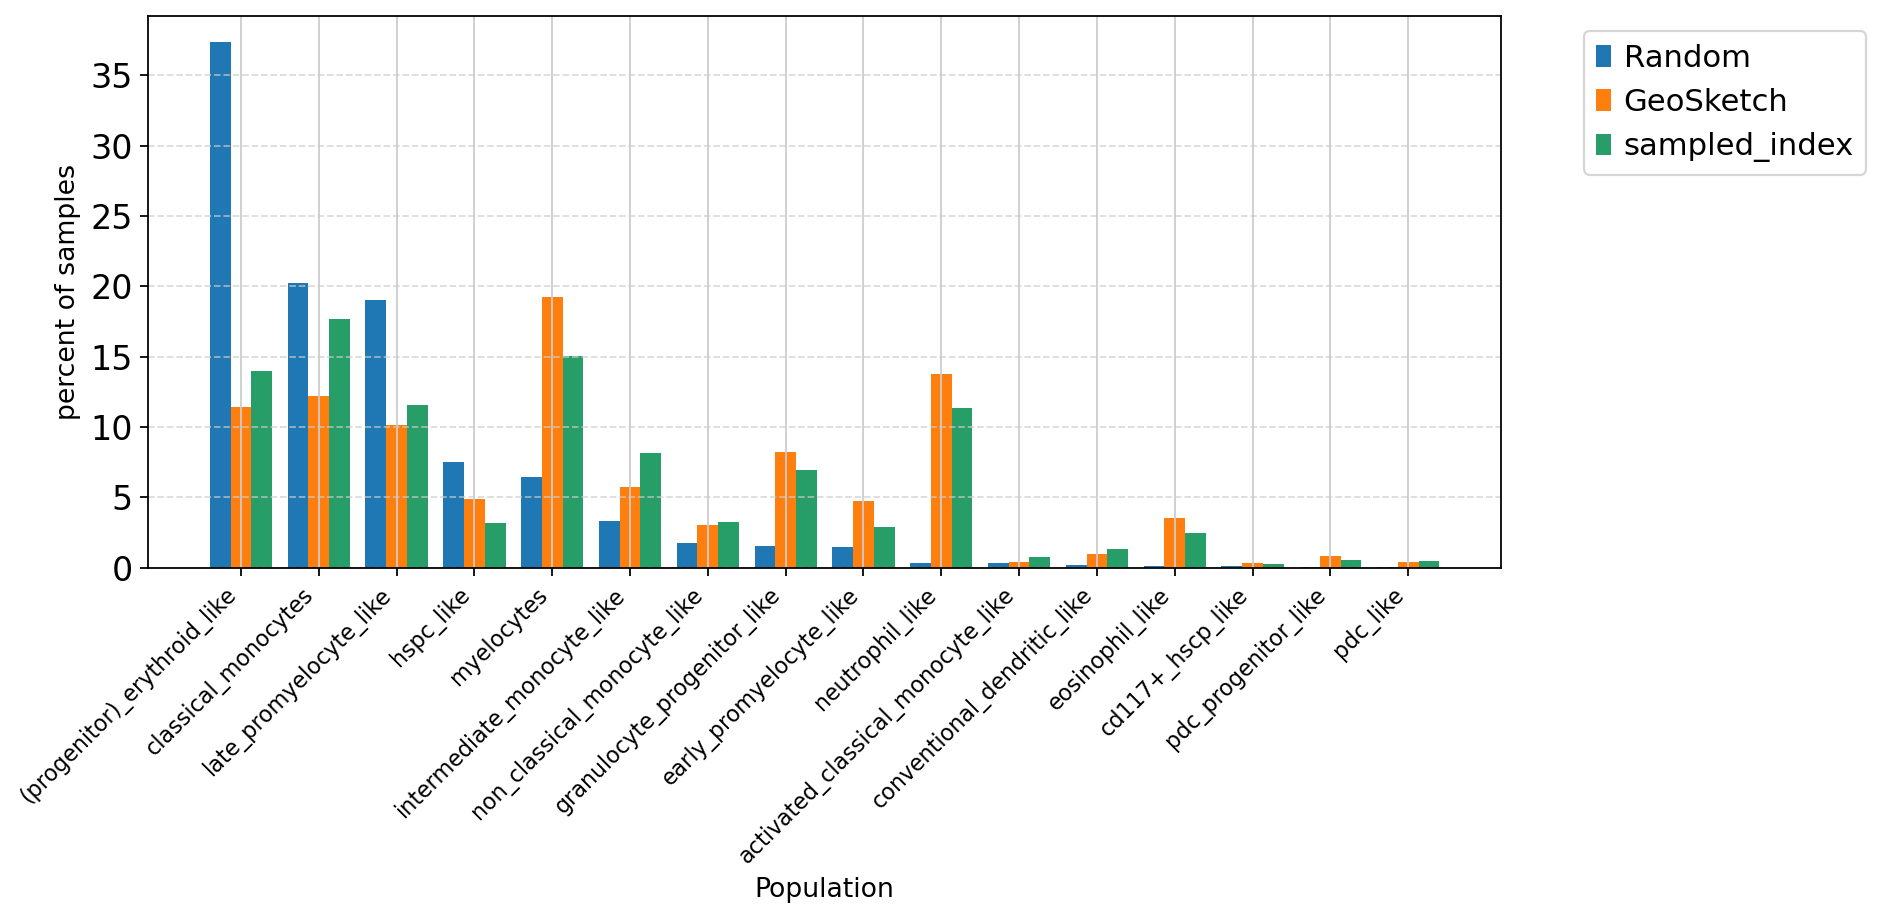

In [202]:
plot_improved_population_distribution([adata_ref[rs],
                                       adata_ref[sketch_index],
                                       adata_ref[accumulated_indices]],
                                      ['Random', 'GeoSketch', 'sampled_index'], adata_ref)

## try on the pca

In [11]:
def generate_samples(df):
    generated_samples_indices_list = []
    for i in range(21):
        print(f'********* #PCs  is  {i+1}  *********')
        start_time = time.time()

        pca_bin_out = pca_bin_sample(df, n_bins=5, num_pcs=i+1, min_single_sample_bins=5000)[0]

        elapsed_time = time.time() - start_time
        print(f"Elapsed time: {elapsed_time} seconds")
        generated_samples_indices_list.append(pca_bin_out)
        
    return generated_samples_indices_list

In [12]:
gsil = generate_samples(df)

********* #PCs  is  1  *********
number of samples with the initial 5 bins in each PC is 1
number of  PCs: 1
number of bins: 136320
number of samples: 5039
Elapsed time: 26.255855560302734 seconds
********* #PCs  is  2  *********
number of samples with the initial 5 bins in each PC is 4
number of  PCs: 2
number of bins: 368
number of samples: 5040
Elapsed time: 23.61256241798401 seconds
********* #PCs  is  3  *********
number of samples with the initial 5 bins in each PC is 15
number of  PCs: 3
number of bins: 71
number of samples: 5068
Elapsed time: 18.34995198249817 seconds
********* #PCs  is  4  *********
number of samples with the initial 5 bins in each PC is 46
number of  PCs: 4
number of bins: 31
number of samples: 4895
Elapsed time: 18.450636625289917 seconds
********* #PCs  is  5  *********
number of samples with the initial 5 bins in each PC is 92
number of  PCs: 5
number of bins: 21
number of samples: 5454
Elapsed time: 22.810554265975952 seconds
********* #PCs  is  6  ******

In [88]:
ad_ref = adata_ref.copy()
ad_ref.X = X_pca

In [16]:
# Generate another batch of data for fsbs
from FACS_Sampling.methods.methods import bin_sample
start_time = time.time()

seed = 123
np.random.seed(seed)
new_seed = np.random.randint(100000)
# %time
ps, _ = bin_sample(ad_ref, n_bins=20, s_size=500, seed=new_seed)
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")
print(len(ps))

In [18]:
# Generate another batch of data for fsbs
from FACS_Sampling.methods.methods import sample_random
start_time = time.time()

seed = 123
np.random.seed(seed)
new_seed = np.random.randint(100000)
rs = sample_random(ad_ref, s_size=len(real_bin_out), seed=new_seed)
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.04460453987121582 seconds


In [13]:
rs.shape

(217768,)

In [89]:
start_time = time.time()

# Compute PCs.
from fbpca import pca
U, s, Vt = pca(X, k=4) # E.g., 4 PCs.
X_dimred = U[:, :4] * s[:4]
# Now, you are ready to sketch!

# Sketch.
from geosketch import gs
N = len(cube_out) # Number of samples to obtain from the data set.
sketch_index = gs(X_dimred, N, replace=False)

X_sketch = X_dimred[sketch_index]
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 29.908249855041504 seconds


In [91]:
adata_ref[sketch_index].obs['population'].value_counts()

population
(progenitor)_erythroid_like    85
myelocytes                     75
neutrophil_like                70
classical_monocytes            61
hspc_like                      34
late_promyelocyte_like         33
early_promyelocyte_like        31
intermediate_monocyte_like     18
granulocyte_progenitor_like    17
pdc_progenitor_like            15
non_classical_monocyte_like    15
eosinophil_like                11
pdc_like                        6
cd117+_hscp_like                4
conventional_dendritic_like     2
Name: count, dtype: int64

In [92]:
adata_ref[cube_out].obs['population'].value_counts()

population
(progenitor)_erythroid_like    203
myelocytes                      55
hspc_like                       49
late_promyelocyte_like          46
classical_monocytes             33
neutrophil_like                 22
granulocyte_progenitor_like     21
pdc_progenitor_like              9
cd117+_hscp_like                 9
early_promyelocyte_like          7
non_classical_monocyte_like      7
eosinophil_like                  6
intermediate_monocyte_like       4
conventional_dendritic_like      3
pdc_like                         3
Name: count, dtype: int64

#### In the next cell I am trying to use same PCs as I was using in our method to see the differences in the performance

In [20]:
# start_time = time.time()

# # Compute PCs.
# from fbpca import pca
# k = 4  # E.g., 22 PCs.
# U, s, Vt = pca(X, k=k) 
# X_dimred = U[:, :k] * s[:k]
# # Now, you are ready to sketch!

# # Sketch.
# from geosketch import gs
# N = 5320 # Number of samples to obtain from the data set.
# sketch_index = gs(X_dimred, N, replace=False)

# X_sketch = X_dimred[sketch_index]
# elapsed_time = time.time() - start_time
# print(f"Elapsed time: {elapsed_time} seconds")

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scanpy as sc

def plot_improved_population_distribution(adata_list, labels, adata_ref):
    # Create a DataFrame to hold the count data
    pop_counts = pd.DataFrame({
        label: adata.obs['population'].value_counts(normalize=True) * 100
        for adata, label in zip(adata_list, labels)
    })

    # Sort the populations based on the counts in adata_ref
    ref_order = adata_ref.obs['population'].value_counts().index
    pop_counts = pop_counts.reindex(ref_order)

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    n = len(pop_counts.columns)
    bar_width = 0.8 / n
    indices = np.arange(len(pop_counts))

    for i, label in enumerate(labels):
        ax.bar(indices + i * bar_width, pop_counts[label], bar_width, label=label)

    # Improve the aesthetics
    ax.set_xlabel('Population', fontsize=12)
    ax.set_ylabel('percent of samples', fontsize=12)
    ax.set_xticks(indices + bar_width * (n - 1) / 2)
    ax.set_xticklabels(pop_counts.index, rotation=45, ha='right', fontsize=10)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

### Quantile based

In [22]:
import numpy as np
import pandas as pd

def quantile_based_sampling(data, size, quantile_percentage, accumulation_method='sum'):
    """
    Perform quantile-based sampling on multi-dimensional data.

    :param data: A NumPy array or Pandas DataFrame with multi-dimensional data.
    :param quantile_percentage: The percentage for quantile binning.
    :param accumulation_method: Method to accumulate probabilities ('sum', 'product', 'min', 'max').
    :return: Indices of sampled data points.
    """
    # Convert to DataFrame for ease of processing
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data)

    # Calculate quantile bins and probabilities
    quantile_values = data.quantile(np.arange(0, 1 + quantile_percentage, quantile_percentage))
    probabilities = pd.DataFrame(index=data.index, columns=data.columns)

    for feature in data.columns:
        # Assign probabilities inversely proportional to bin length
        for i in range(len(quantile_values) - 1):
            lower_bound = quantile_values.iloc[i][feature]
            upper_bound = quantile_values.iloc[i + 1][feature]
            bin_indices = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)].index
            bin_length = upper_bound - lower_bound
            probabilities.loc[bin_indices, feature] = bin_length if bin_length > 0 else 1
    
        # Normalize probabilities for the feature
        probabilities[feature] /= probabilities[feature].sum()
    
    # Accumulate probabilities across features
    if accumulation_method == 'sum':
        final_probabilities = probabilities.sum(axis=1)
    elif accumulation_method == 'product':
        final_probabilities = probabilities.product(axis=1)
    elif accumulation_method == 'min':
        final_probabilities = probabilities.min(axis=1)
    elif accumulation_method == 'max':
        final_probabilities = probabilities.max(axis=1)
    else:
        raise ValueError("Invalid accumulation method")

    # Normalize probabilities to sum to 1
    final_probabilities /= final_probabilities.sum()

    # Perform weighted sampling
    sampled_indices = np.random.choice(final_probabilities.index, size=size, replace=False,
                                       p=final_probabilities)
    
    return sampled_indices



In [23]:
start_time = time.time()

np.random.seed(0)  # For reproducibility
quant_samples = quantile_based_sampling(adata_ref.X, size=len(real_bin_out), quantile_percentage=0.05,
                                        accumulation_method='max')

elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 24.749136924743652 seconds


In [38]:
data = pd.DataFrame(adata_ref.X)
quantile_values = data.quantile(np.arange(0, 1 + 0.05, 0.05))
probabilities = pd.DataFrame(index=data.index, columns=data.columns)

## on real data

In [ ]:
# plot_improved_population_distribution([adata_ref[gsil[0]], adata_ref[gsil[1]], adata_ref[gsil[2]], adata_ref[gsil[3]],
                                      # adata_ref[gsil[4]], adata_ref[gsil[5]], adata_ref[gsil[6]], adata_ref[gsil[7]]],
                                      # ['1PC', '2PC', '3PC', '4PC', '5PC', '6PC', '7PC', '8PC'], adata_ref)

In [25]:
len(real_bin_out)

6799

In [26]:
rs = np.random.randint(0, adata_ref.shape[0], size=len(real_bin_out))

In [27]:
# sub_real = np.random.choice(real_bin_out, 5454)

In [28]:
adata_ref

AnnData object with n_obs × n_vars = 1252975 × 22
    obs: 'old_index', 'unique_id', 'sex', 'age', 'subtype', 'type', 'blastcount', 'survival_sorter', 'run', 'sample_id', 'alignment_mc_aligned', 'flowsom_cluster', 'flowsom_metacluster', 'population'

In [29]:
print(len(rs), len(sketch_index), len(real_bin_out) )

6799 6799 6799


In [30]:
plot_improved_population_distribution([adata_ref[rs], adata_ref[quant_samples], adata_ref[sketch_index], adata_ref[real_bin_out]],
                                      ['random', 'quant', 'GeoSketch', 'Cubic'], adata_ref)

NameError: name 'quant_samples' is not defined

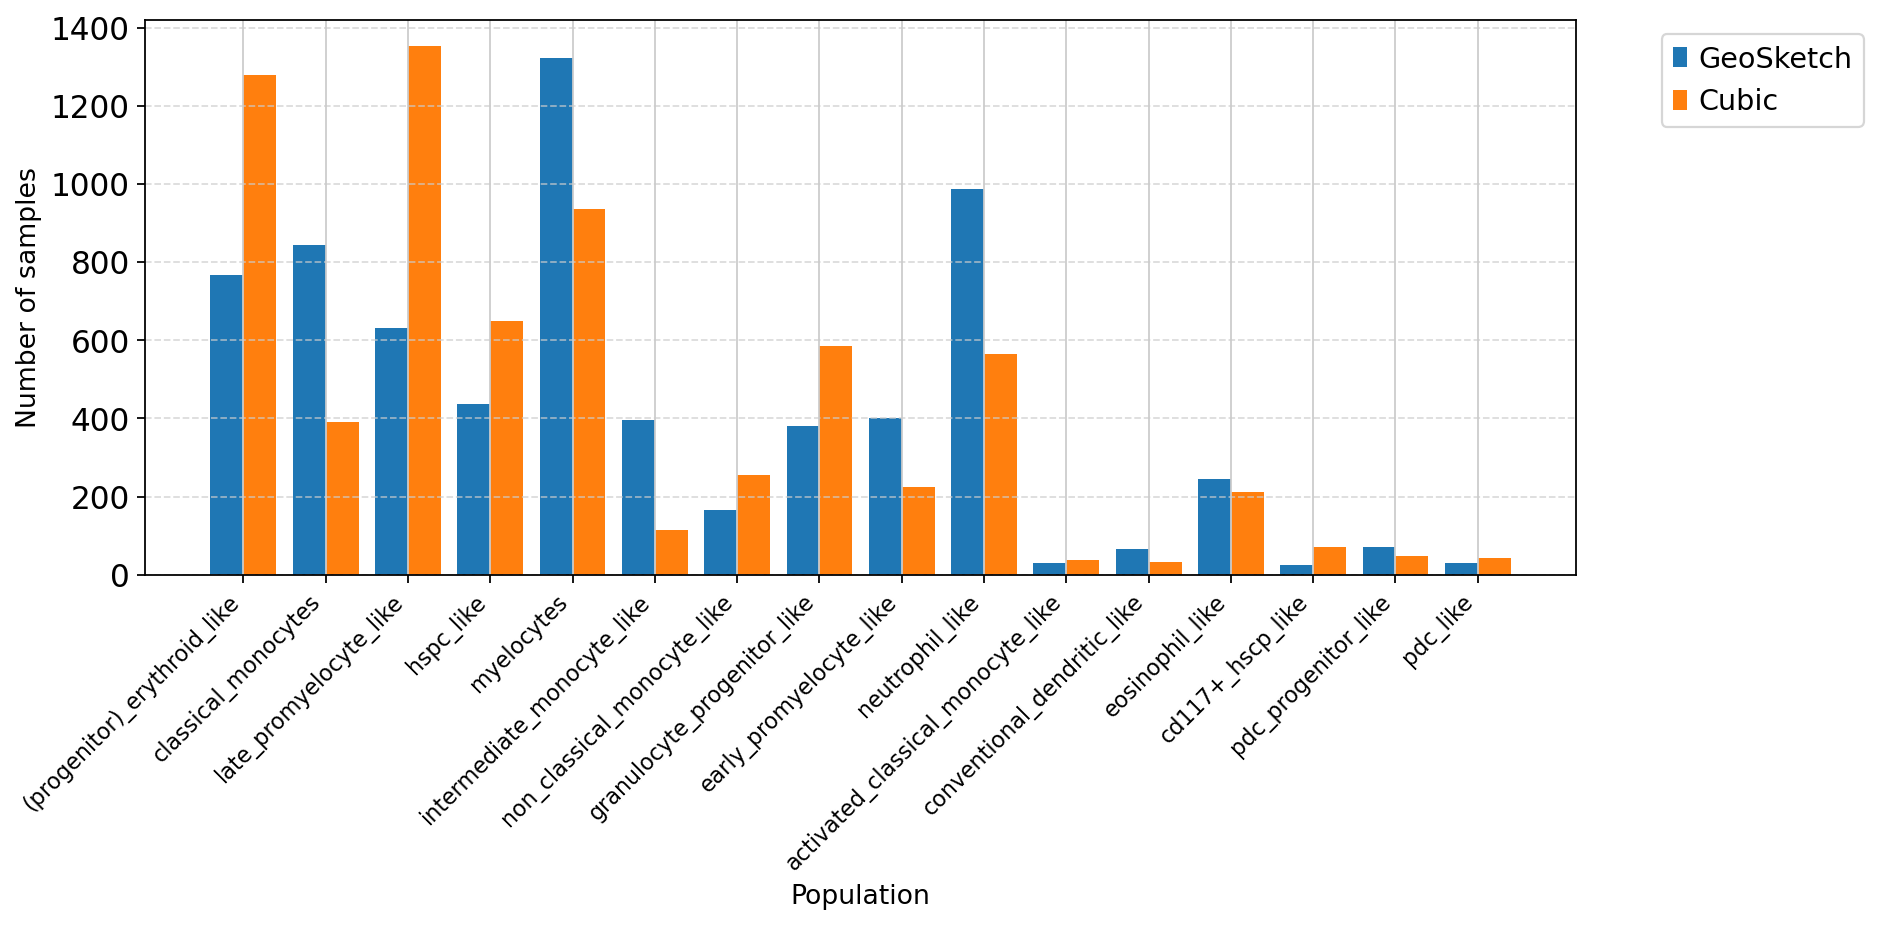

In [31]:
plot_improved_population_distribution([adata_ref[sketch_index],
                                       adata_ref[real_bin_out]],
                                      ['GeoSketch', 'Cubic'], adata_ref)

In [32]:
adata_ref[sketch_index].obs['population'].value_counts()

population
myelocytes                           1323
neutrophil_like                       988
classical_monocytes                   843
(progenitor)_erythroid_like           766
late_promyelocyte_like                631
hspc_like                             438
early_promyelocyte_like               401
intermediate_monocyte_like            397
granulocyte_progenitor_like           380
eosinophil_like                       244
non_classical_monocyte_like           167
pdc_progenitor_like                    70
conventional_dendritic_like            66
activated_classical_monocyte_like      31
pdc_like                               29
cd117+_hscp_like                       25
Name: count, dtype: int64

In [33]:
adata_ref[real_bin_out].obs['population'].value_counts()

population
late_promyelocyte_like               1353
(progenitor)_erythroid_like          1279
myelocytes                            936
hspc_like                             650
granulocyte_progenitor_like           586
neutrophil_like                       564
classical_monocytes                   392
non_classical_monocyte_like           256
early_promyelocyte_like               224
eosinophil_like                       213
intermediate_monocyte_like            114
cd117+_hscp_like                       70
pdc_progenitor_like                    49
pdc_like                               43
activated_classical_monocyte_like      37
conventional_dendritic_like            33
Name: count, dtype: int64

In [53]:
len(gsil[4])

5454

## on pcas

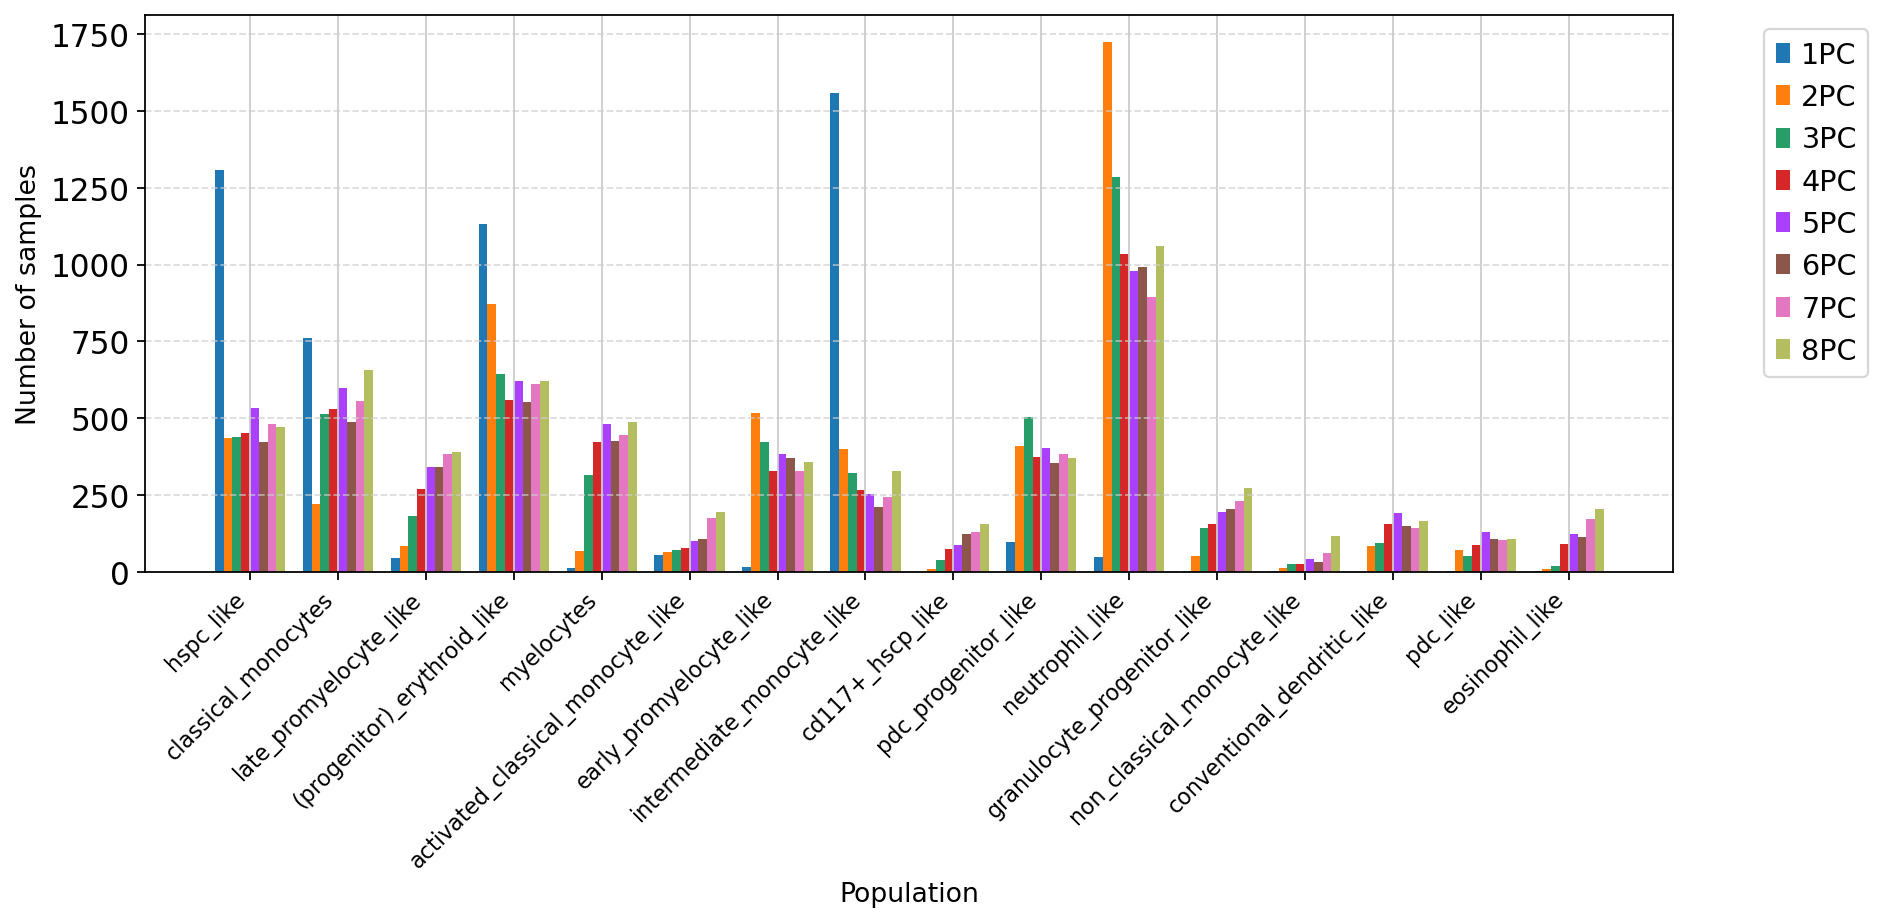

In [15]:
plot_improved_population_distribution([adata_ref[gsil[0]], adata_ref[gsil[1]], adata_ref[gsil[2]], adata_ref[gsil[3]],
                                      adata_ref[gsil[4]], adata_ref[gsil[5]], adata_ref[gsil[6]], adata_ref[gsil[7]]],
                                      ['1PC', '2PC', '3PC', '4PC', '5PC', '6PC', '7PC', '8PC'], adata_ref)

In [16]:
min([ len(_) for _ in gsil])

1549

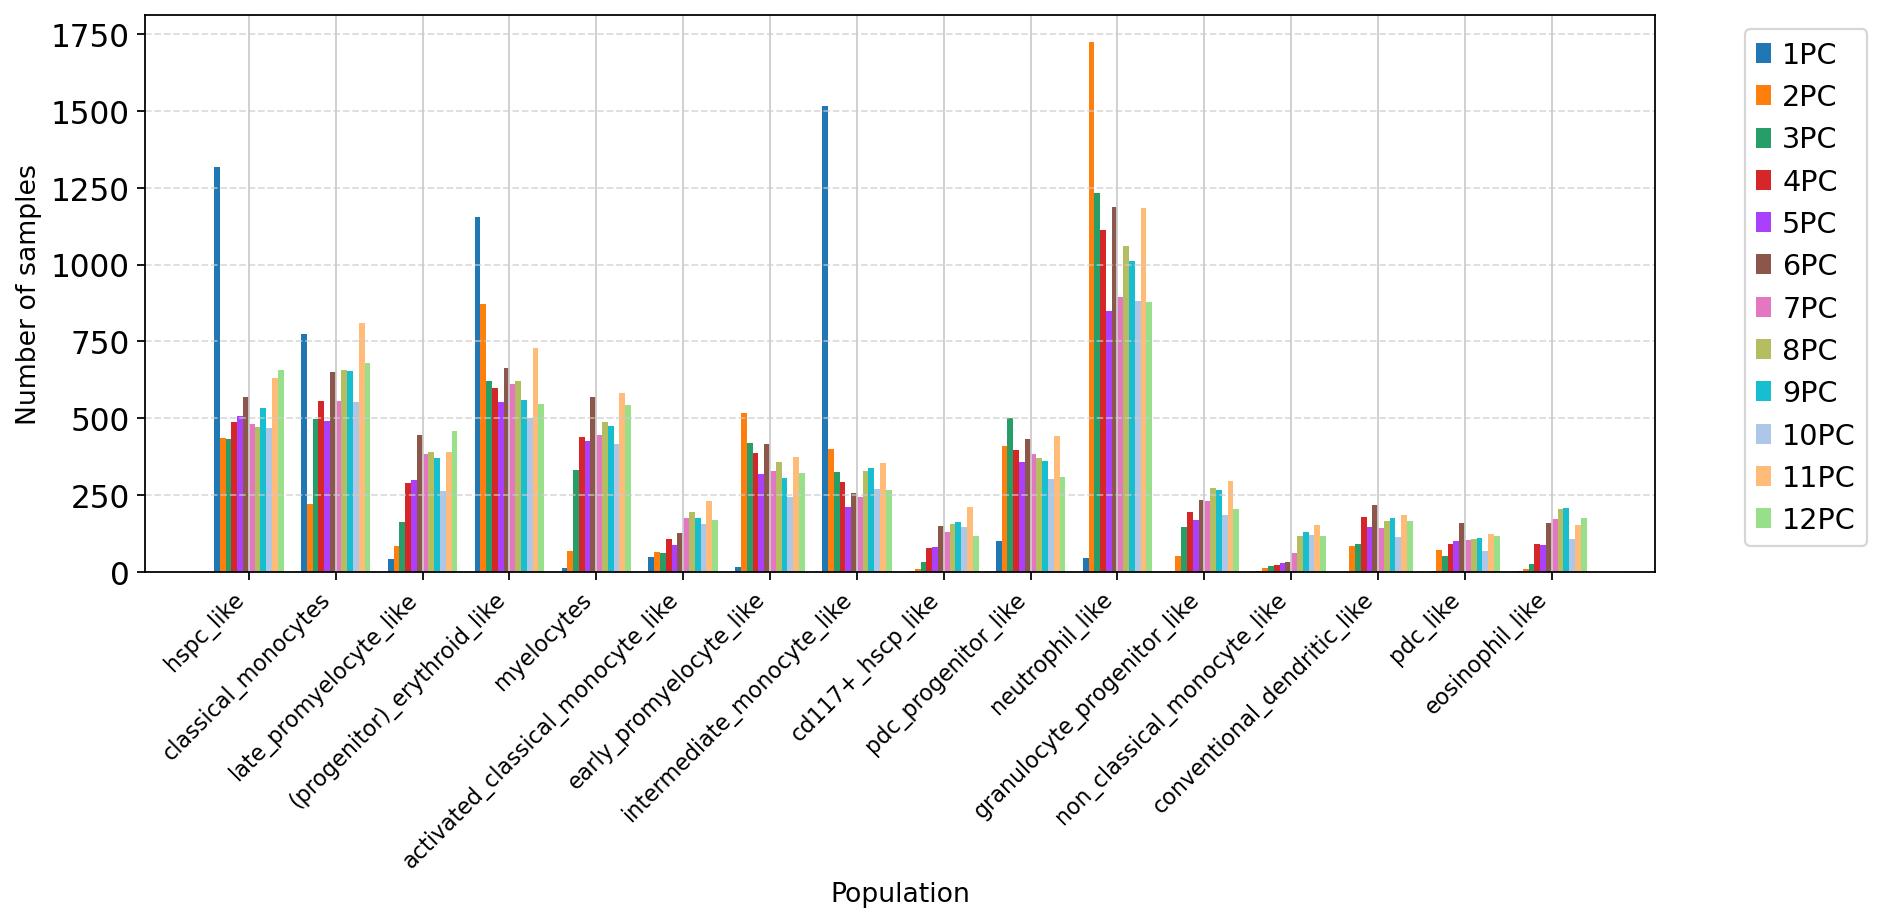

In [70]:
plot_improved_population_distribution([adata_ref[gsil[0]], adata_ref[gsil[1]], adata_ref[gsil[2]], adata_ref[gsil[3]],
                                      adata_ref[gsil[4]], adata_ref[gsil[5]], adata_ref[gsil[6]], adata_ref[gsil[7]],
                                      adata_ref[gsil[8]], adata_ref[gsil[9]], adata_ref[gsil[10]], adata_ref[gsil[11]]],
                                      ['1PC', '2PC', '3PC', '4PC', '5PC', '6PC', '7PC', '8PC', '9PC', '10PC', '11PC', '12PC'], adata_ref)

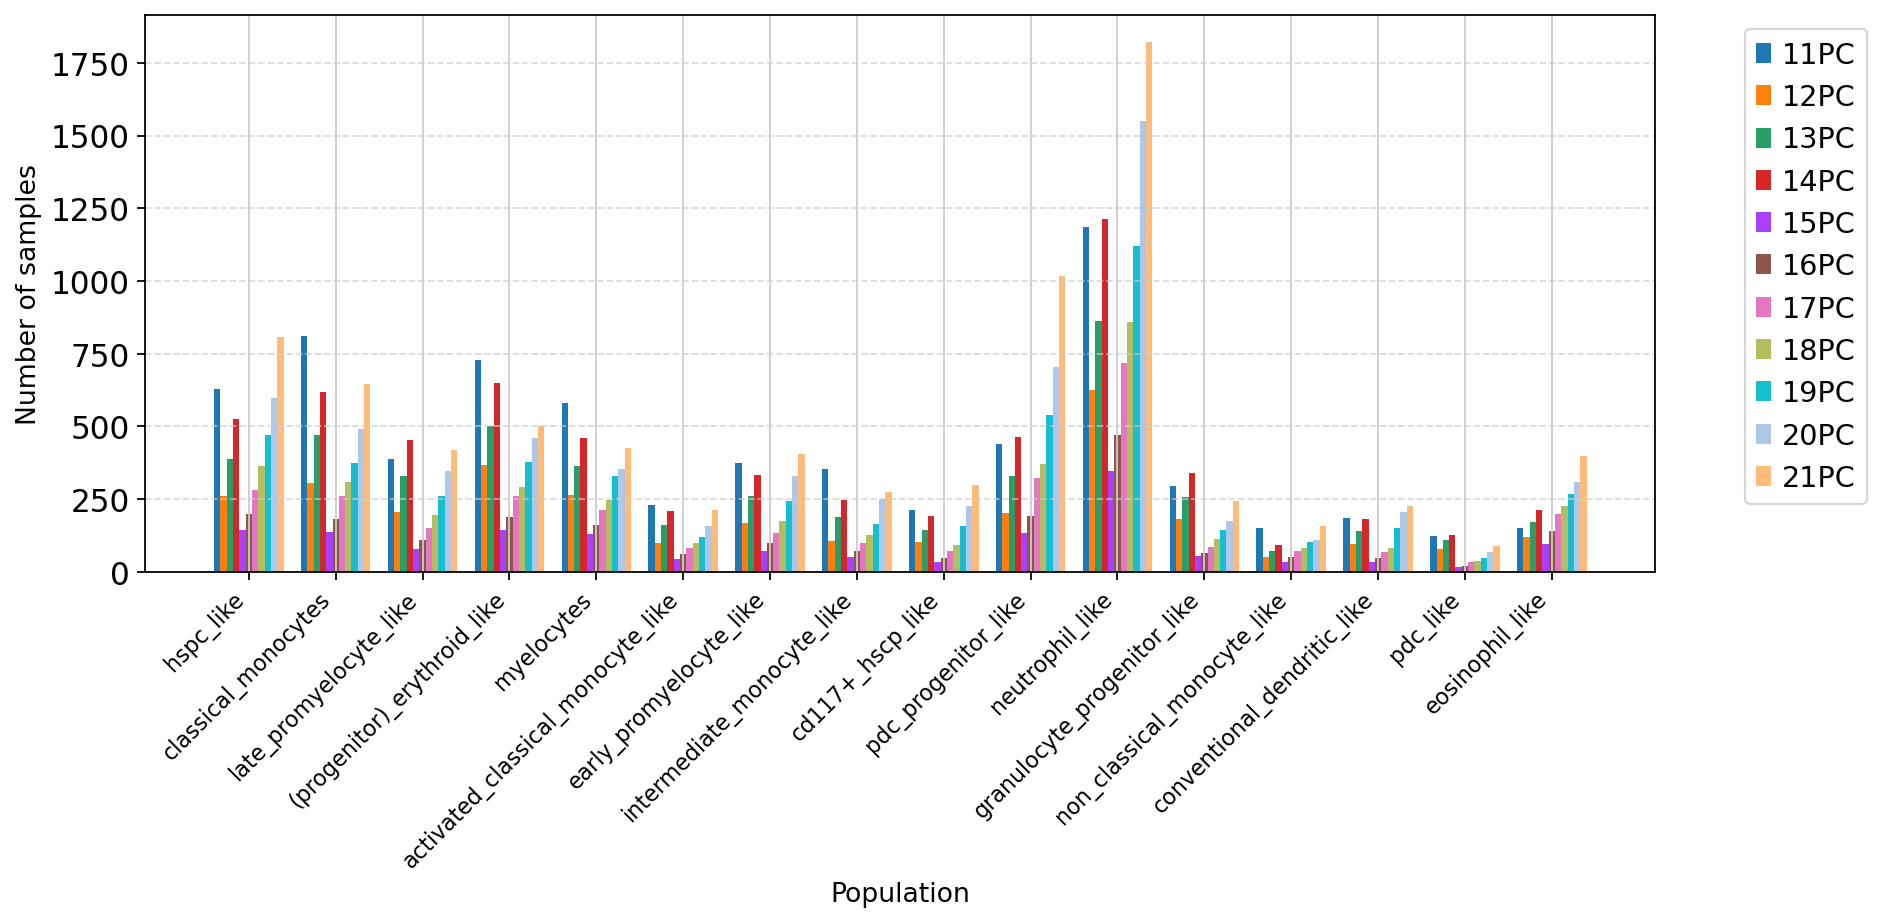

In [23]:
plot_improved_population_distribution([adata_ref[gsil[10]], adata_ref[gsil[11]], adata_ref[gsil[12]], adata_ref[gsil[13]],
                                      adata_ref[gsil[14]], adata_ref[gsil[15]], adata_ref[gsil[16]], adata_ref[gsil[17]],
                                      adata_ref[gsil[18]], adata_ref[gsil[19]], adata_ref[gsil[20]]],
                                      ['11PC', '12PC', '13PC', '14PC', '15PC', '16PC', '17PC', '18PC', '19PC', '20PC', '21PC'], adata_ref)